# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0714611s

In [1]:
# Uvozimo vse potrebne knjižnice
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import imageio.v2 as imageio
import numpy as np
import plotly.express as px
import matplotlib.dates as mdates
import seaborn as sns
import datetime
from matplotlib.dates import DateFormatter
import plotly.graph_objs as go
import plotly.offline as pyo

## ŠTEVILO PROSTIH DELOVNIH MEST SKUPAJ

In [2]:
import warnings
warnings.simplefilter("ignore", category = FutureWarning)

# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo šumnike nadomestili s sprejemljivimi inačicami (Š - S, Č - C, Ž - Z)

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
prosta_delovna_mesta_skupaj = pd.read_csv("../../podatki/delovna_mesta/prosta_delovna_mesta_skupaj.csv", sep = ";")

# V vseh vrsticah (z izjemo imen stolpcev) izbrišemo 'M' iz same vrednosti – npr. namesto '3822 M' bo sedaj vrednost '3822'
prosta_delovna_mesta_skupaj.iloc[:, 1:] = prosta_delovna_mesta_skupaj.iloc[:, 1:].applymap(lambda x: x.replace('M', '') if isinstance(x, str) else x)

# V naši podatkovni zbirki vrednost 'N' predstavlja manjkajoči podatek - nadomestimo jih z NaN vrednostjo, ki jo bomo
# ustrezno nadomestili z uporabo strojnega učenja
prosta_delovna_mesta_skupaj.iloc[:, 3:] = prosta_delovna_mesta_skupaj.iloc[:, 3:].replace('N', pd.np.nan)

# Izberemo 5 najbljižjih sosedov
imputer = KNNImputer(n_neighbors=5)

# Nad vsakim stolpec uporabimo KNNImputer, da nadomestimo manjkajoče vrednosti z napovedjo
prosta_delovna_mesta_skupaj.iloc[:, 3:] = imputer.fit_transform(prosta_delovna_mesta_skupaj.iloc[:, 3:])

# Prva dva stolpca pretvorimo v 'STRING'
prosta_delovna_mesta_skupaj.iloc[:, 0:2] = prosta_delovna_mesta_skupaj.iloc[:, 0:2].astype(str)
# Preostale stolpce pretvorimo v 'INTEGER'
prosta_delovna_mesta_skupaj.iloc[:, 2:] = prosta_delovna_mesta_skupaj.iloc[:, 2:].astype(int)

In [3]:
# Shranimo v .xlsx datoteko
# prosta_delovna_mesta_skupaj.to_excel('prosta_delovna_mesta_skupaj.xlsx', index=False)

In [4]:
# Pregled vseh stolpcev
print(prosta_delovna_mesta_skupaj.columns)

Index(['CETRTLETJE', 'MERITVE', 'SKD Dejavnost - SKUPAJ [B do S]',
       'B RUDARSTVO', 'C PREDELOVALNE DEJAVNOSTI',
       'D OSKRBA Z ELEKTRICNO ENERGIJO, PLINOM IN PARO',
       'E OSKRBA Z VODO, RAVNANJE Z ODPLAKAMI IN ODPADKI, SANIRANJE OKOLJA',
       'F GRADBENISTVO', 'G TRGOVINA, VZDRZEVANJE IN POPRAVILA MOTORNIH VOZIL',
       'H PROMET IN SKLADISCENJE', 'I GOSTINSTVO',
       'J INFORMACIJSKE IN KOMUNIKACIJSKE DEJAVNOSTI',
       'K FINANCNE IN ZAVAROVALNISKE DEJAVNOSTI',
       'L POSLOVANJE Z NEPREMICNINAMI',
       'M STROKOVNE, ZNANSTVENE IN TEHNICNE DEJAVNOSTI',
       'N DRUGE RAZNOVRSTNE POSLOVNE DEJAVNOSTI',
       'O DEJAVNOST JAVNE UPRAVE IN OBRAMBE, DEJAVNOST OBVEZNE SOCIALNE VARNOSTI',
       'P IZOBRAZEVANJE', 'Q ZDRAVSTVO IN SOCIALNO VARSTVO',
       'R KULTURNE, RAZVEDRILNE IN REKREACIJSKE DEJAVNOSTI',
       'S DRUGE DEJAVNOSTI'],
      dtype='object')


In [5]:
# Pretvorimo prvi stolpec (ČETRTLETJE) v 'DATETIME'
prosta_delovna_mesta_skupaj.iloc[:,0] = pd.to_datetime(prosta_delovna_mesta_skupaj.iloc[:,0])

### ANALIZA SPREMEMB ŠTEVILA PROSTIH DELOVNIH MEST SKOZI LETA
- Namen je analizirati podatke o številu prostih delovnih mest skozi obdobja in ugotoviti, katera obdobja so bila najboljša za zaposlovanje na različnih področjih dejavnosti po SKD klasifikaciji.

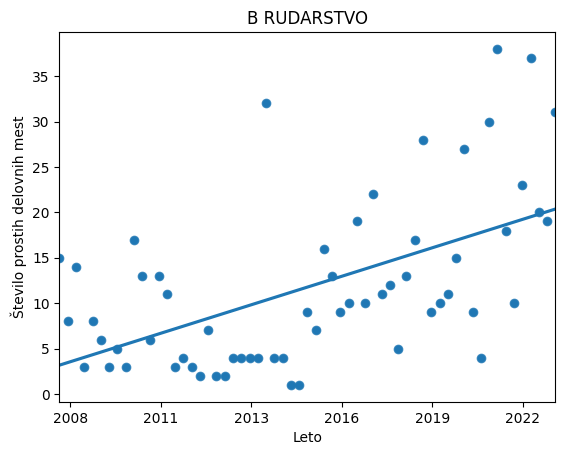

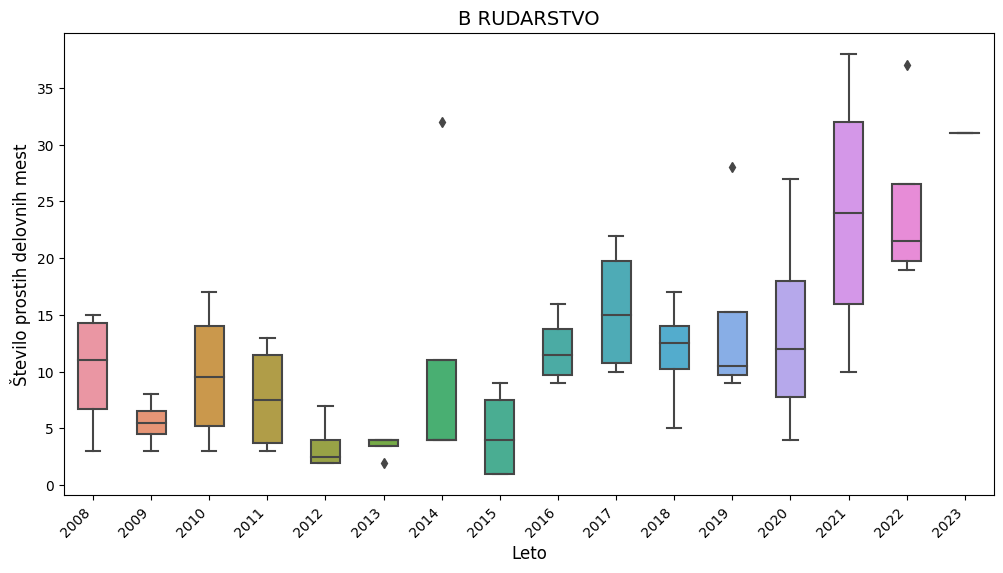

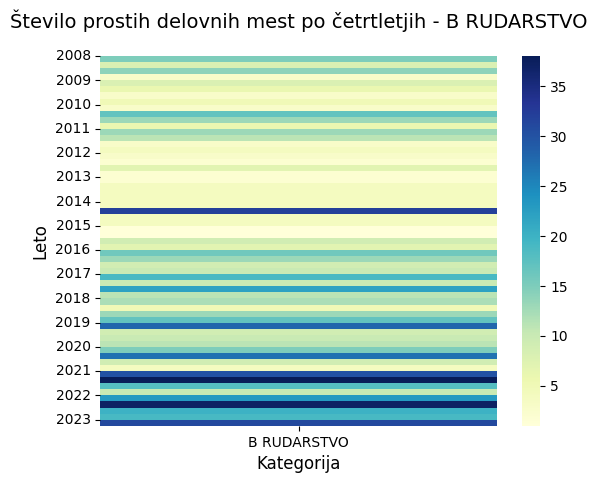

------------------------------------------------------------------------------------


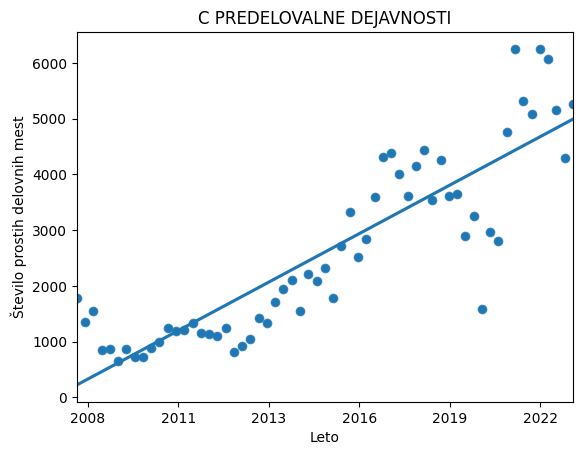

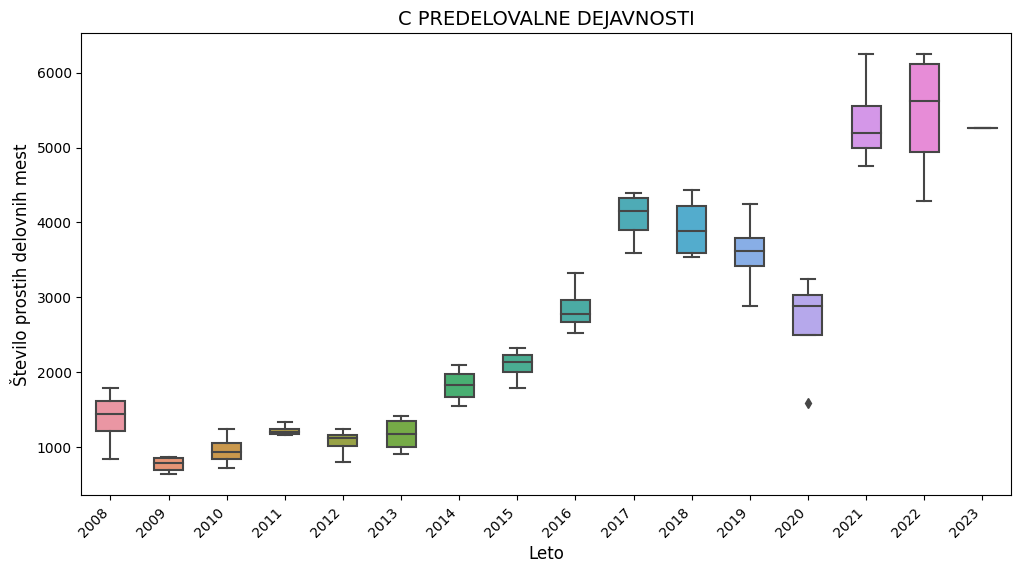

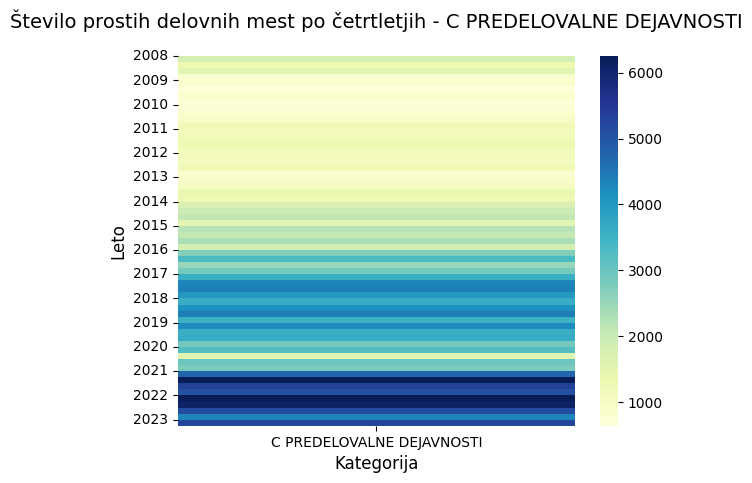

------------------------------------------------------------------------------------


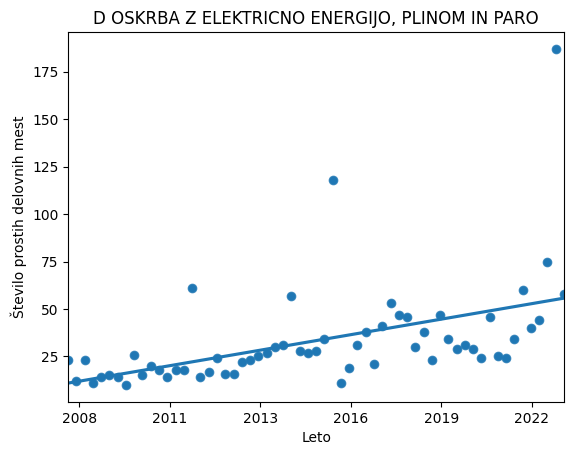

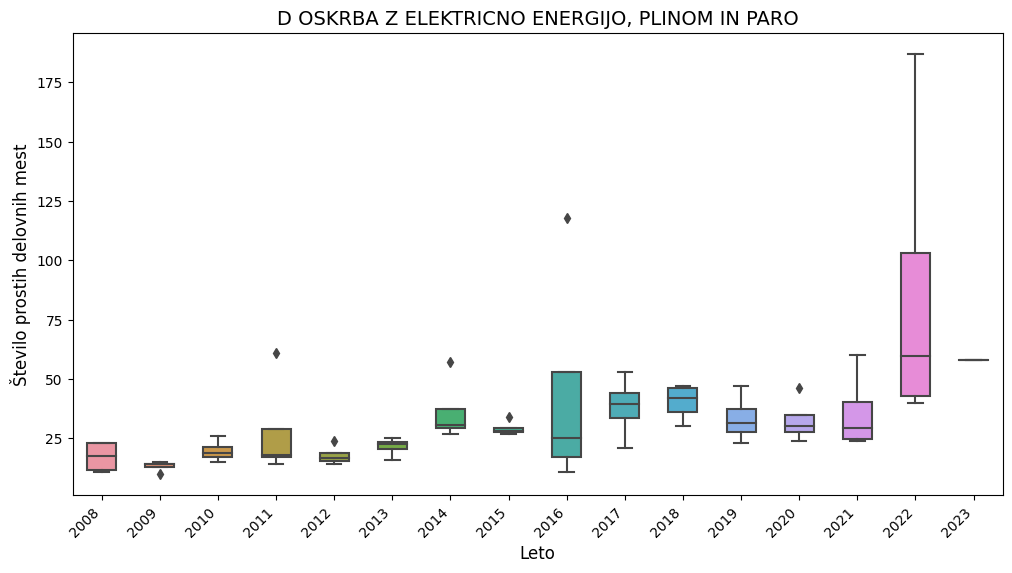

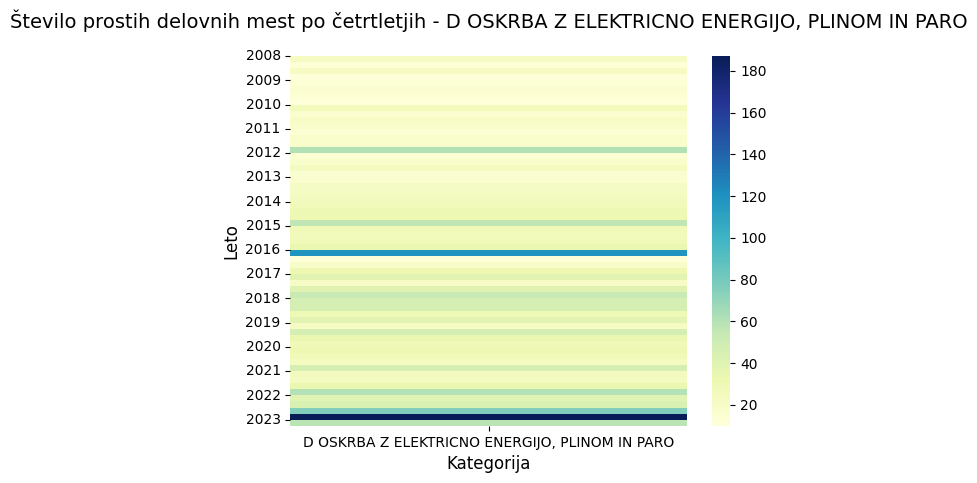

------------------------------------------------------------------------------------


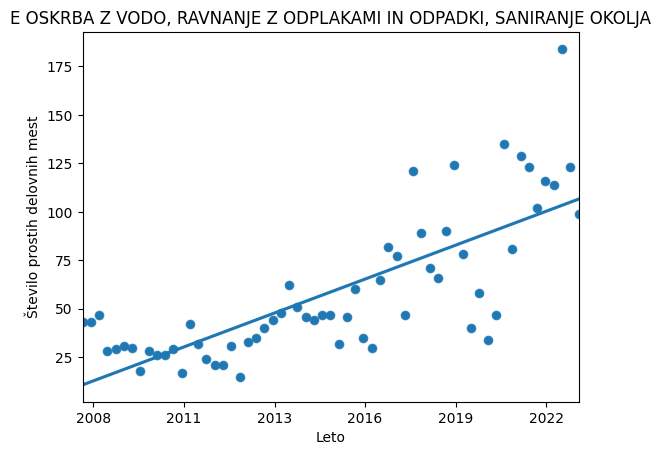

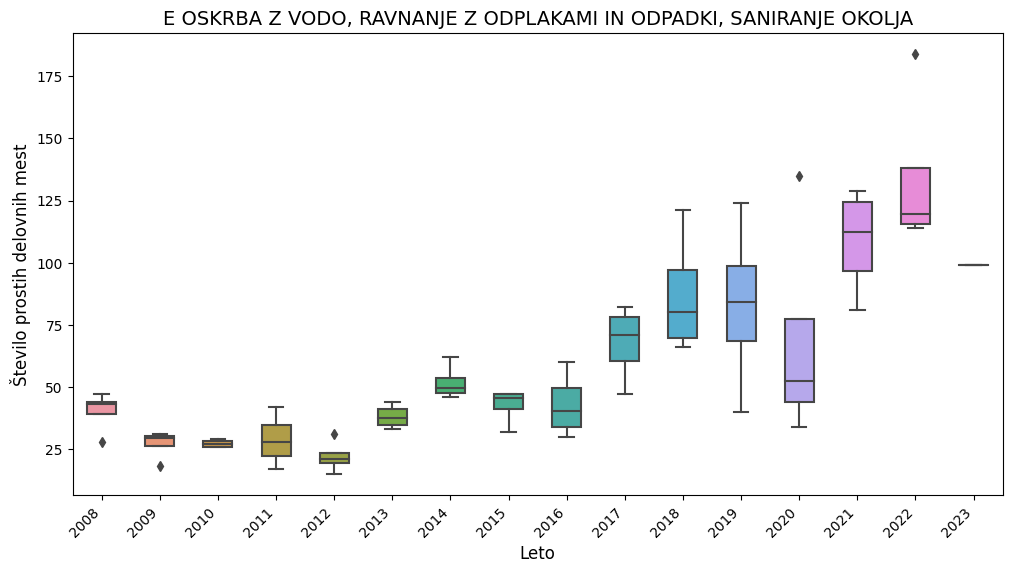

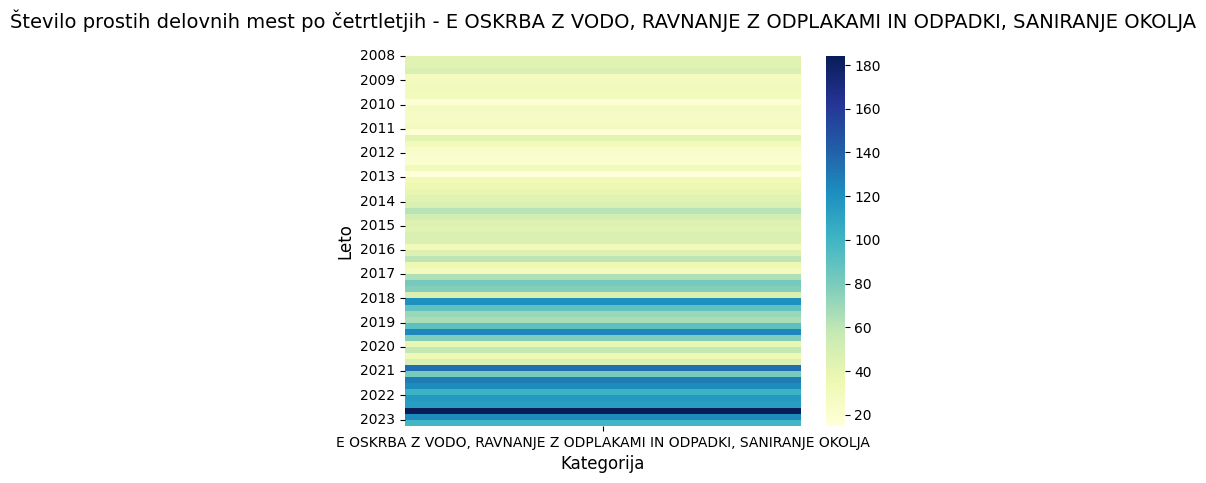

------------------------------------------------------------------------------------


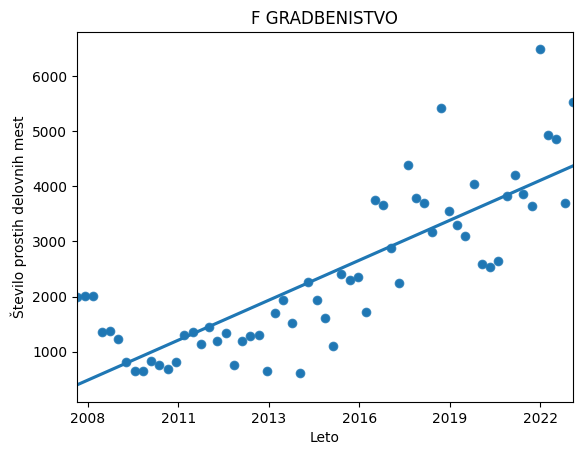

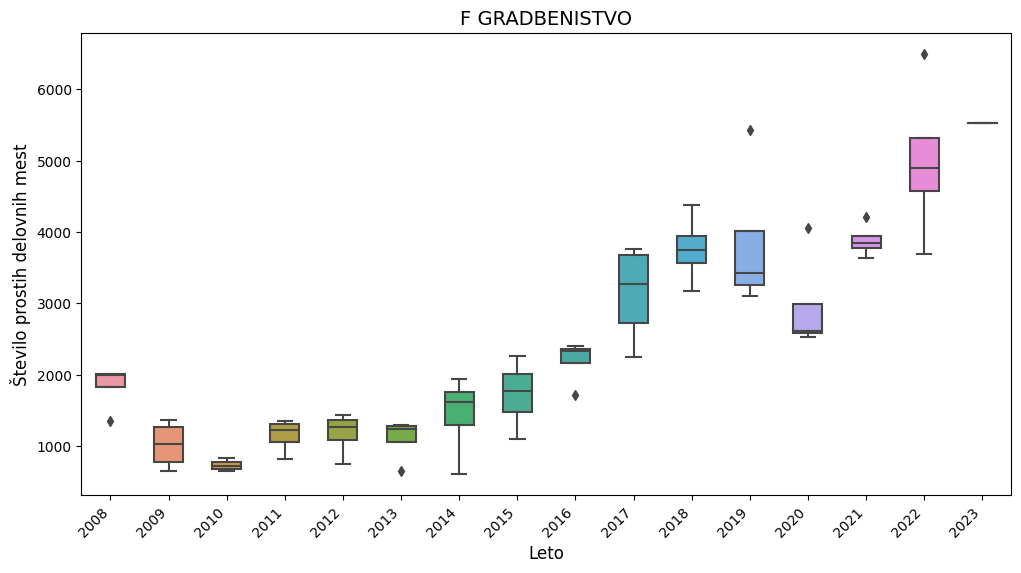

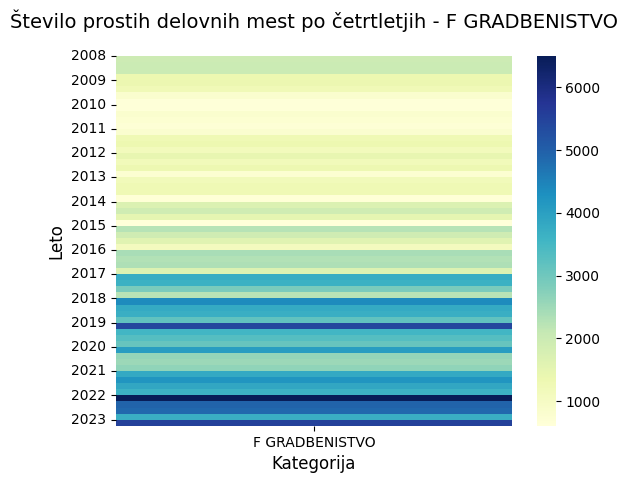

------------------------------------------------------------------------------------


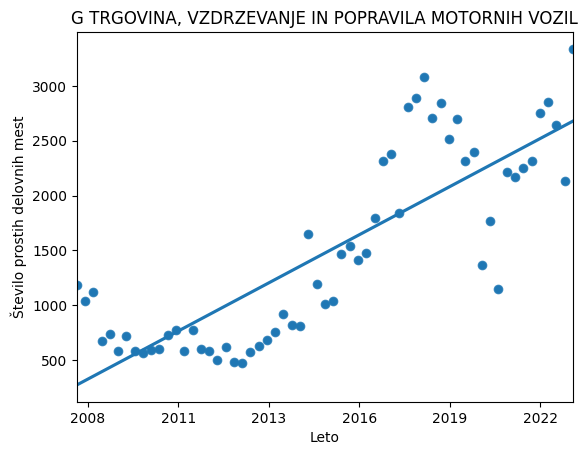

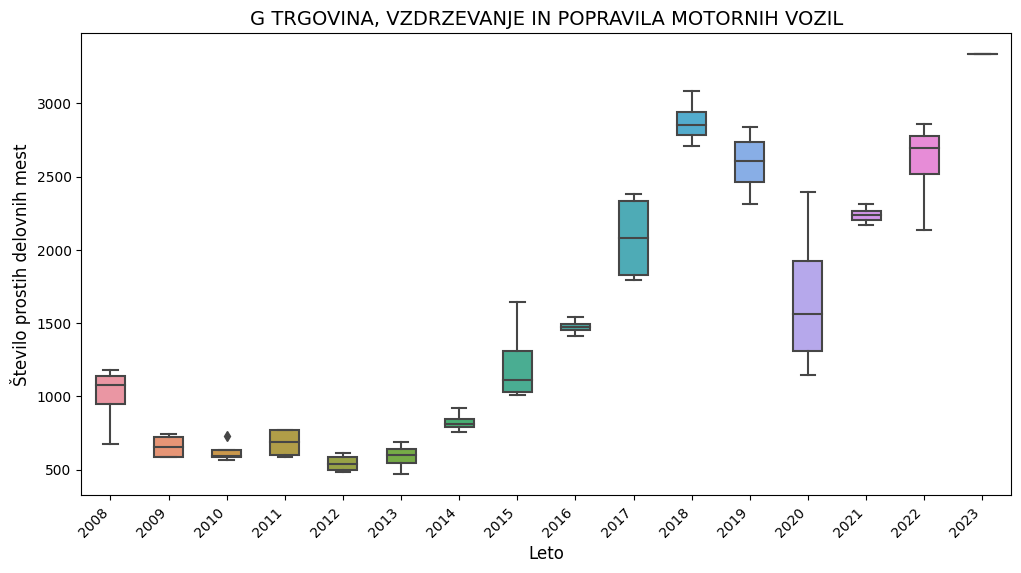

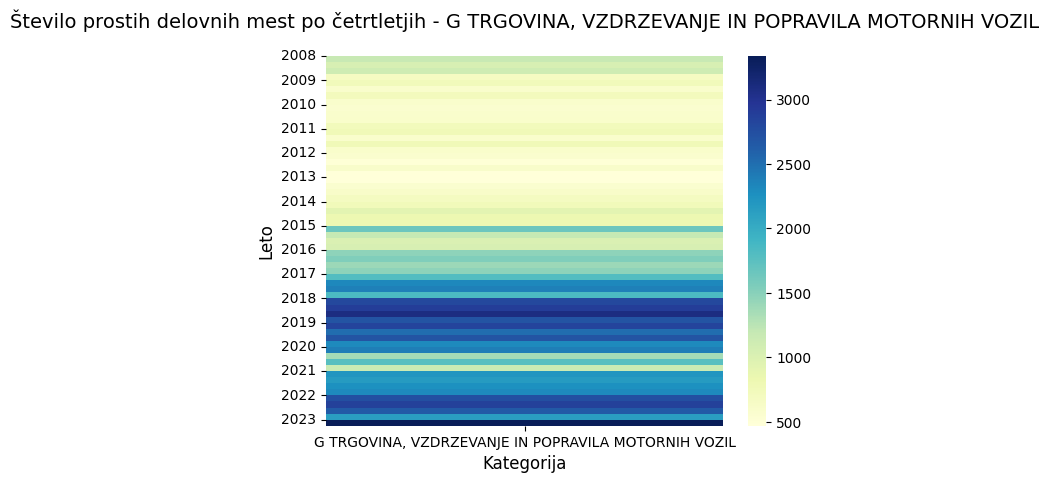

------------------------------------------------------------------------------------


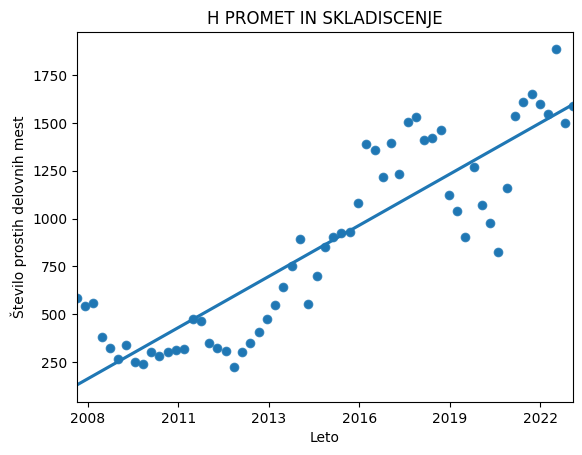

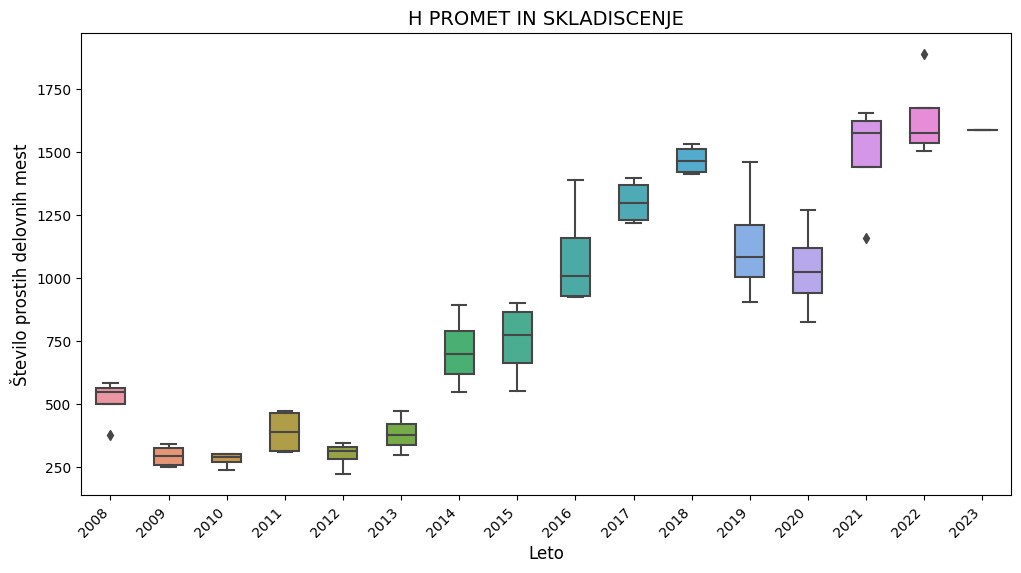

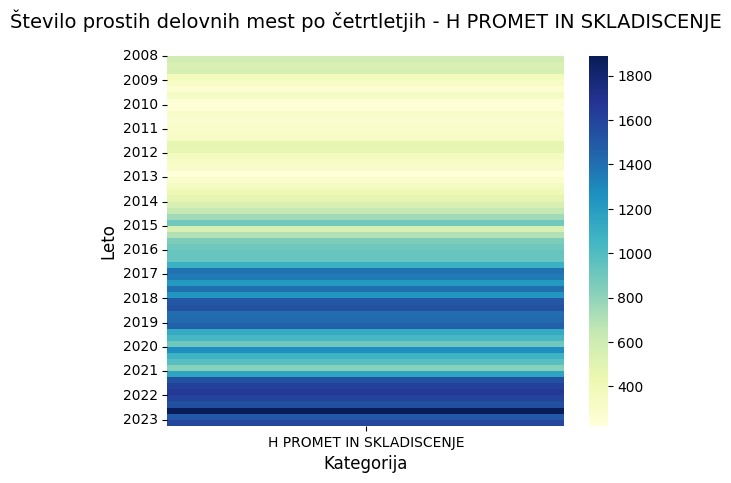

------------------------------------------------------------------------------------


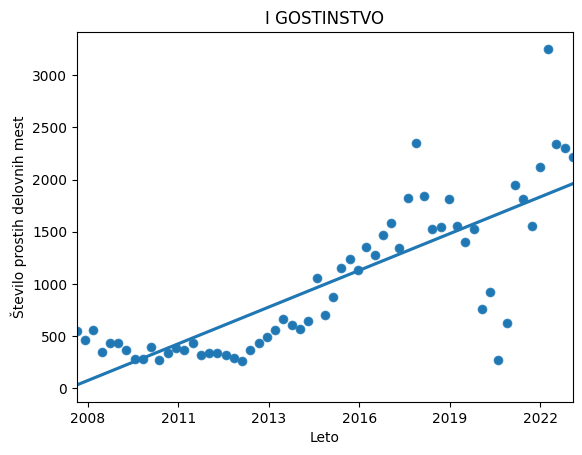

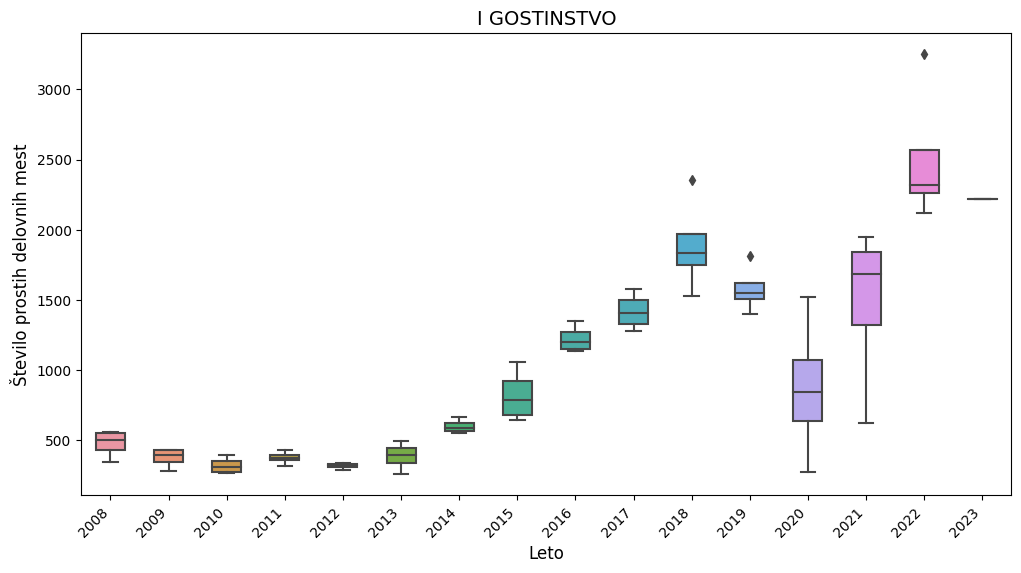

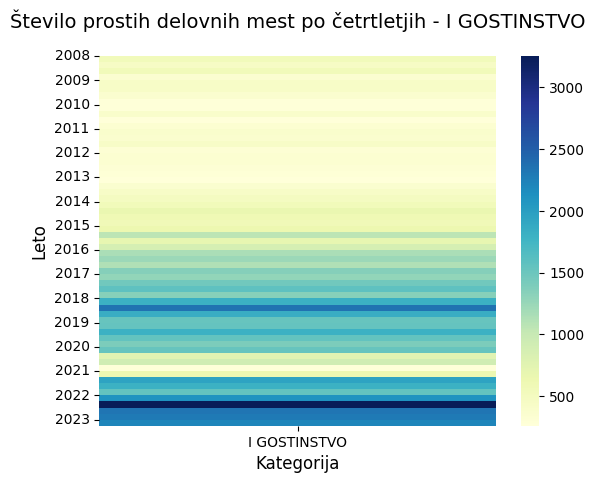

------------------------------------------------------------------------------------


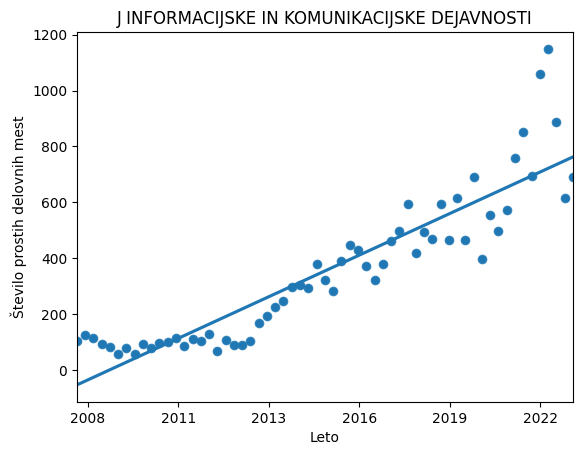

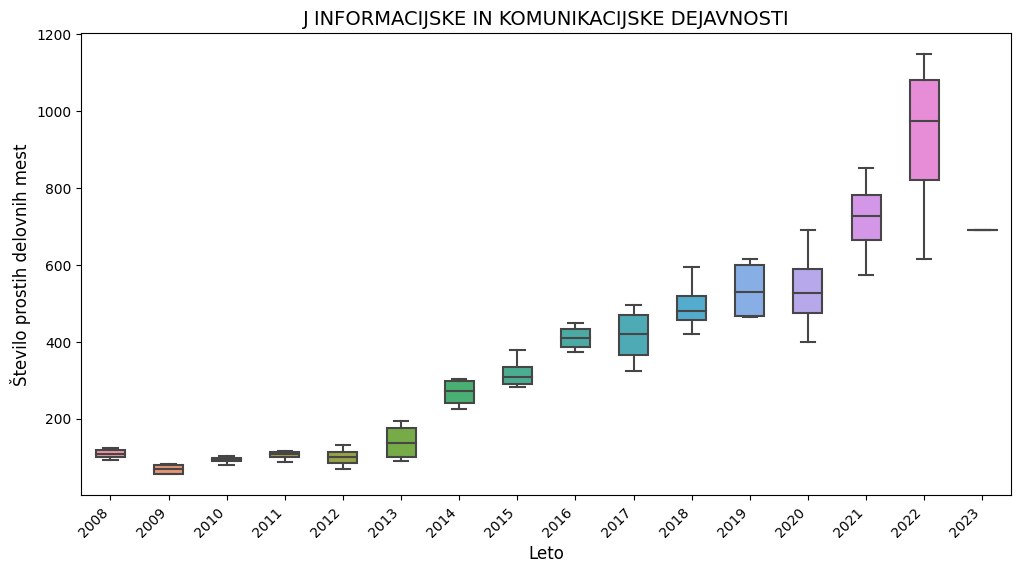

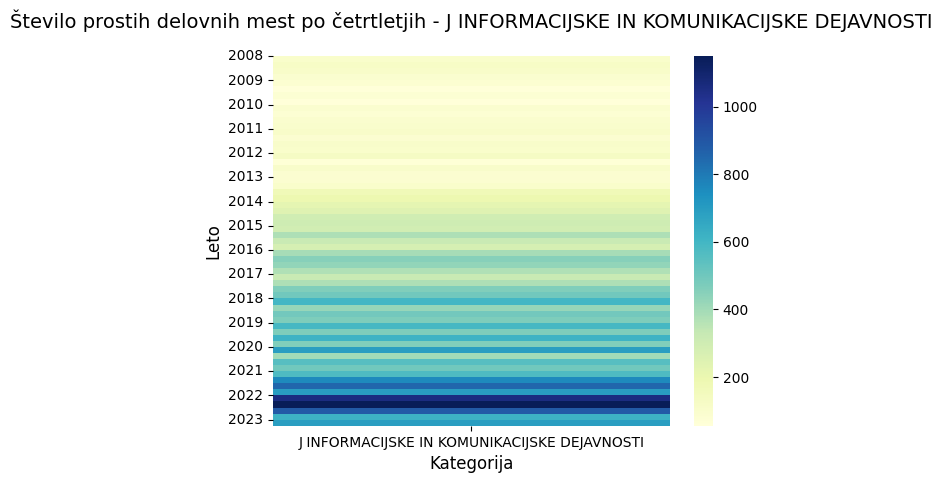

------------------------------------------------------------------------------------


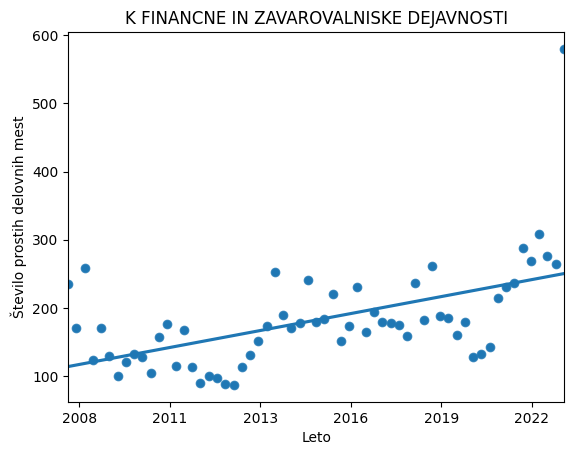

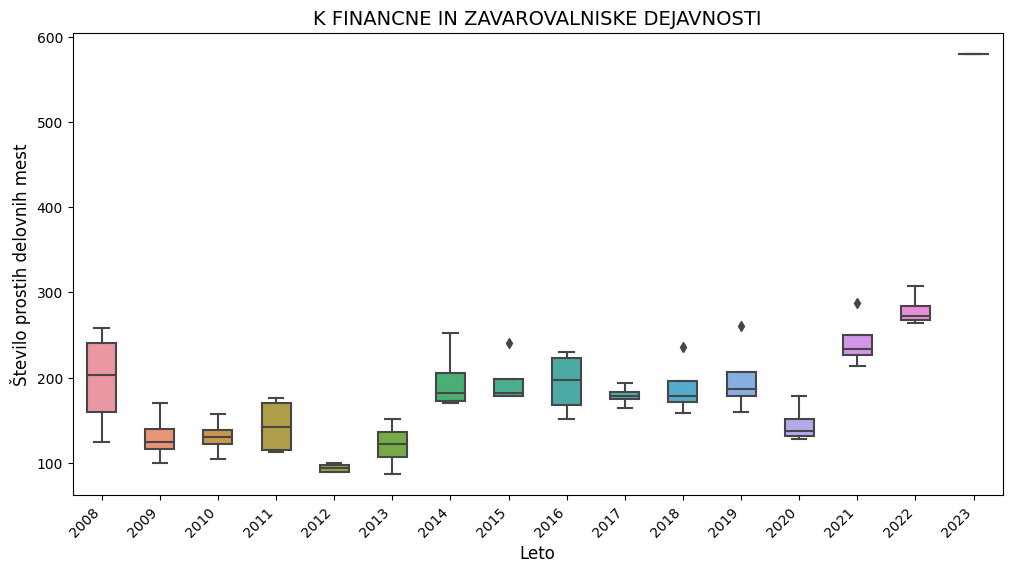

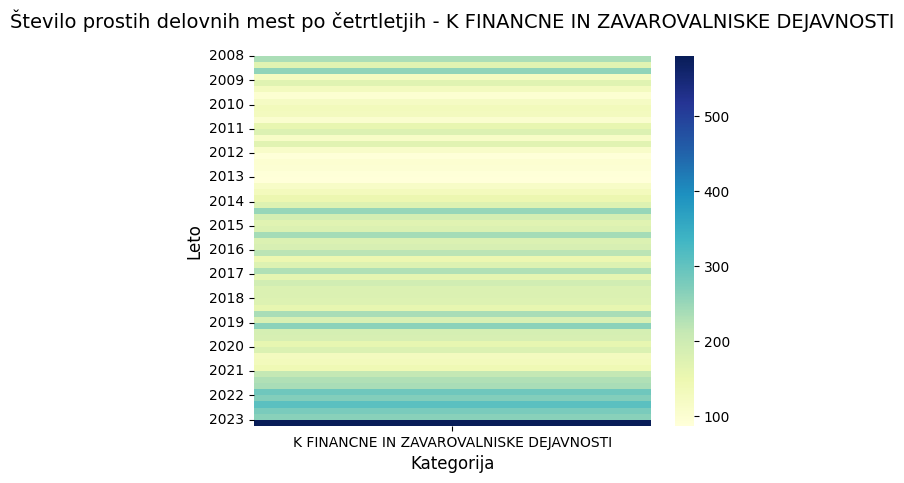

------------------------------------------------------------------------------------


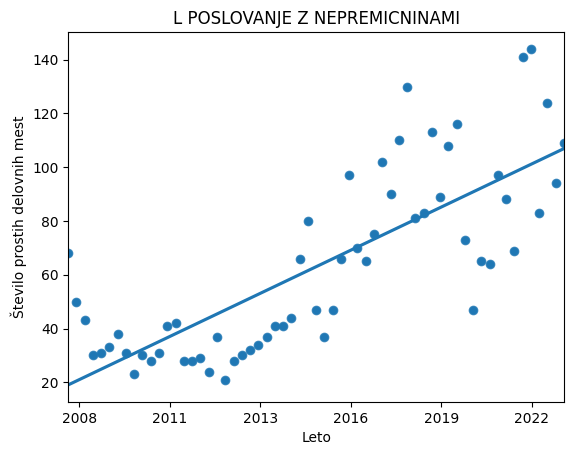

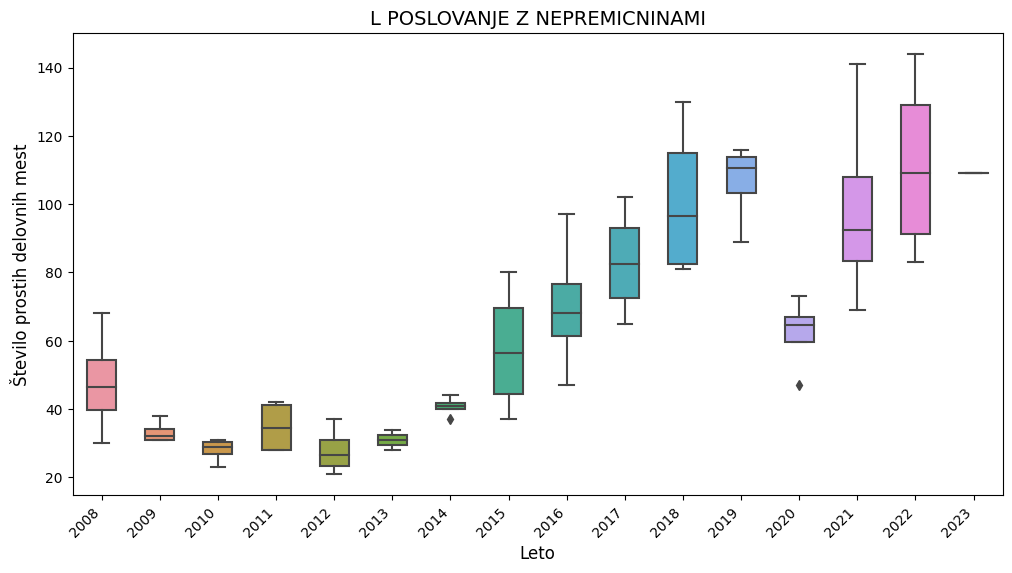

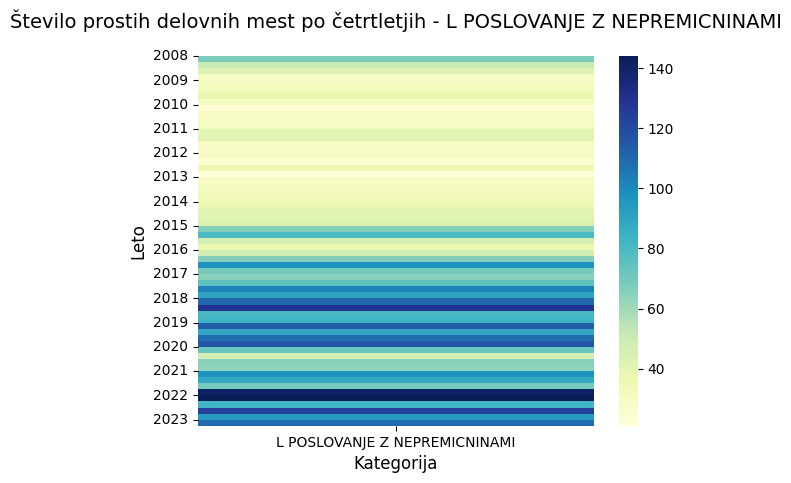

------------------------------------------------------------------------------------


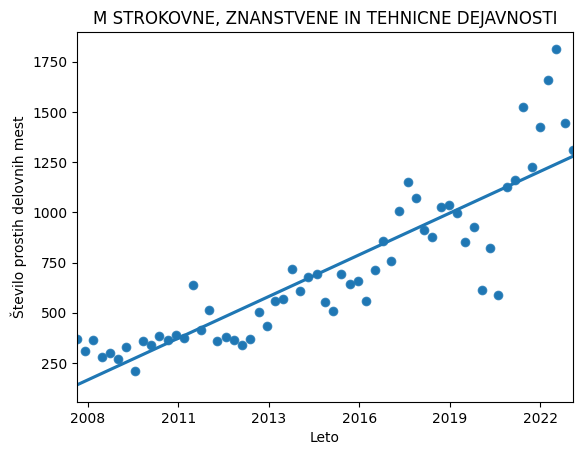

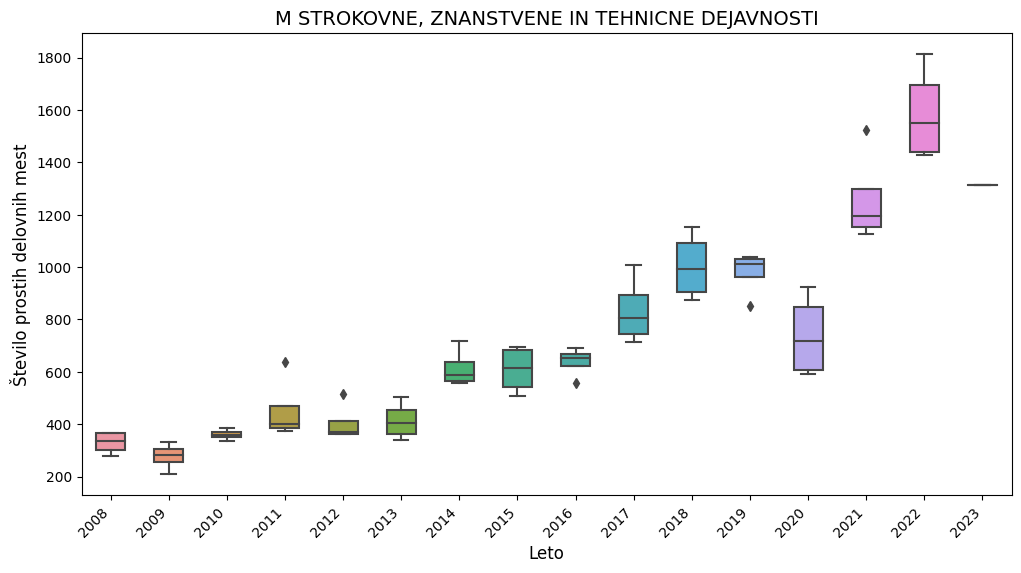

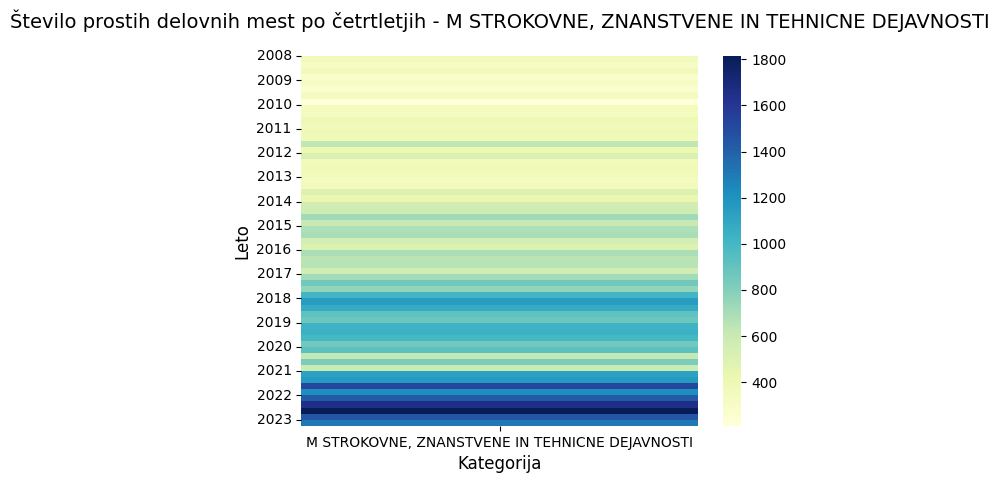

------------------------------------------------------------------------------------


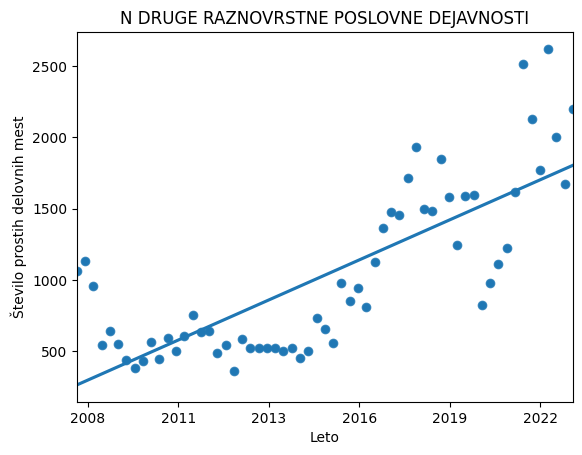

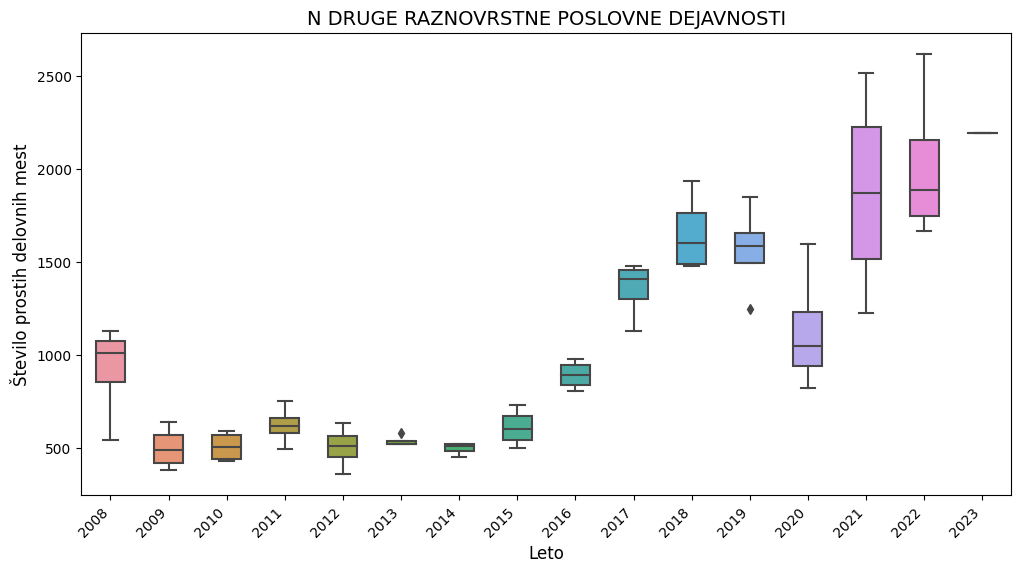

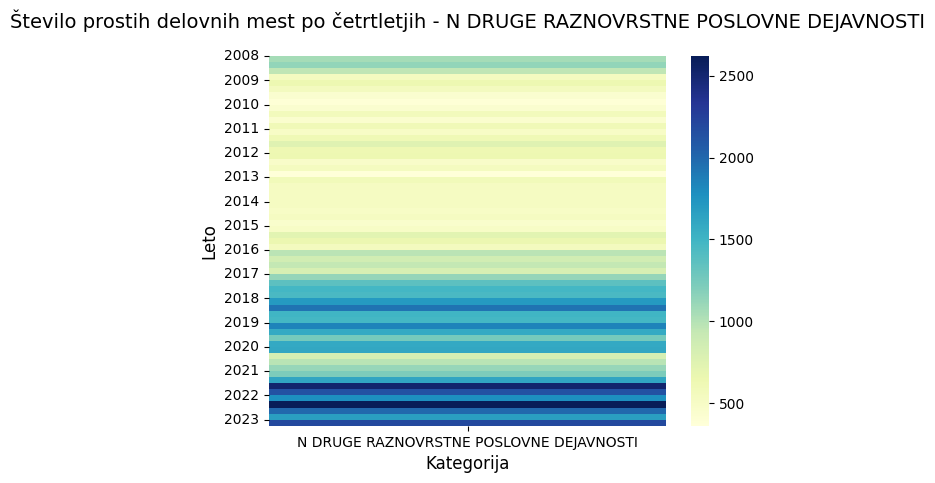

------------------------------------------------------------------------------------


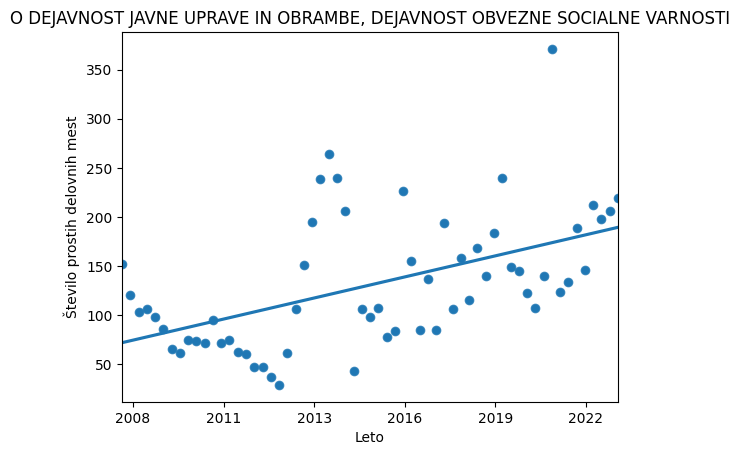

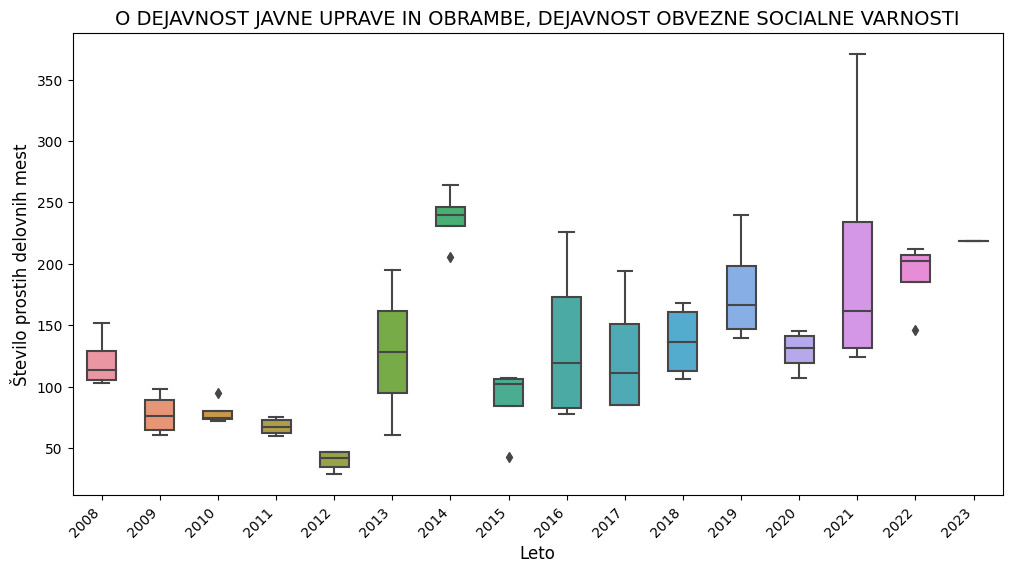

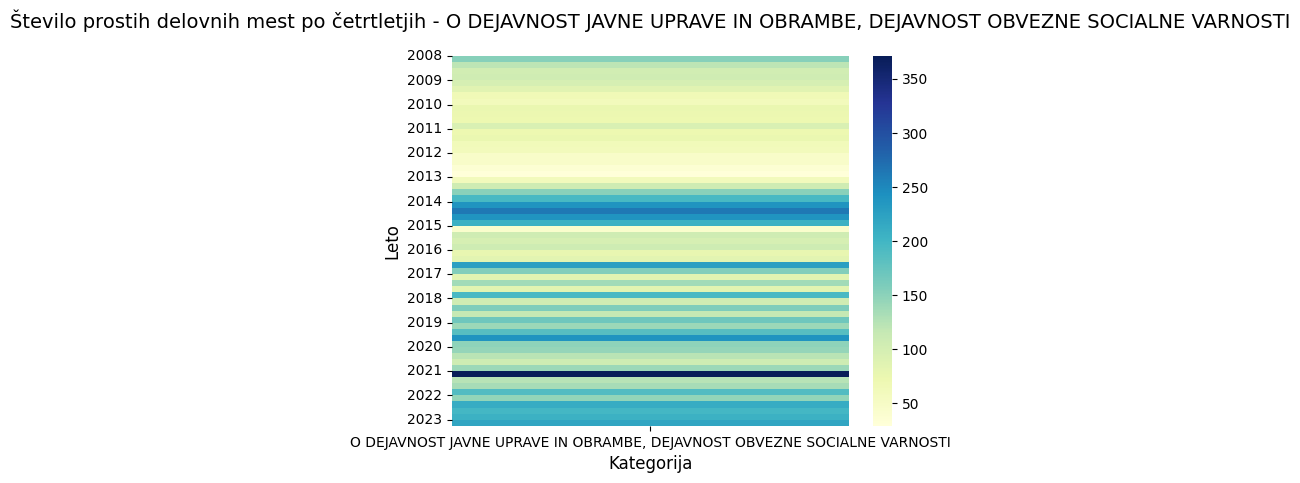

------------------------------------------------------------------------------------


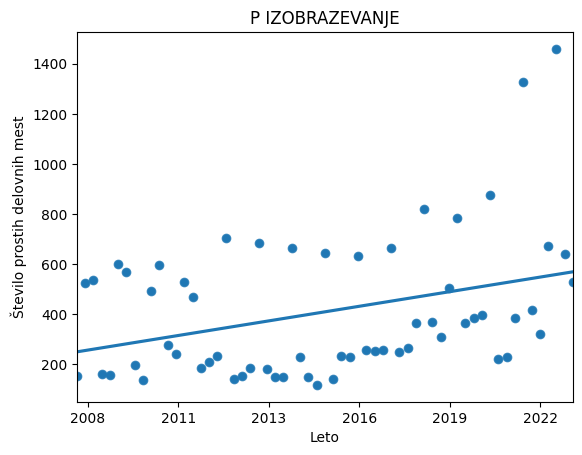

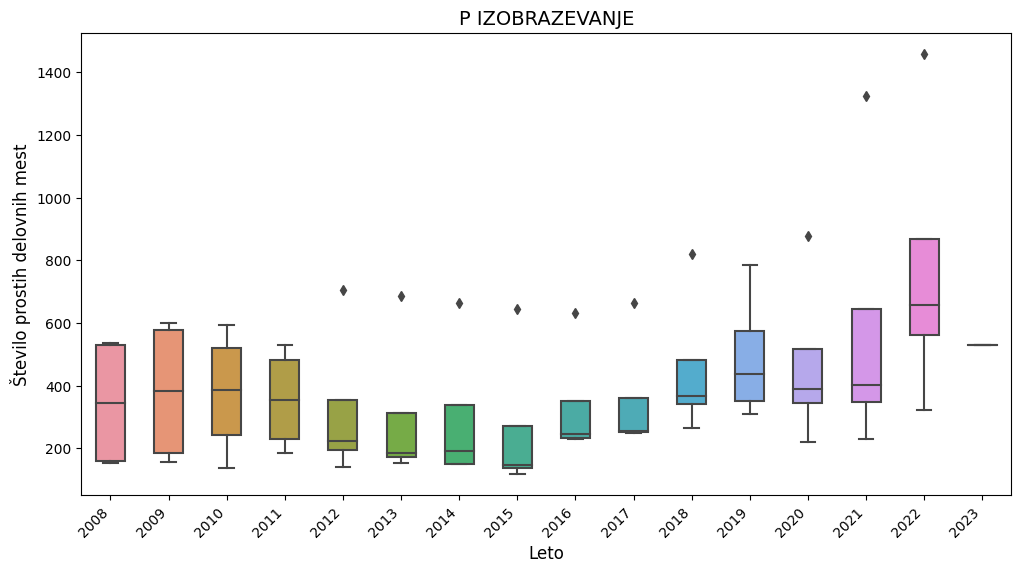

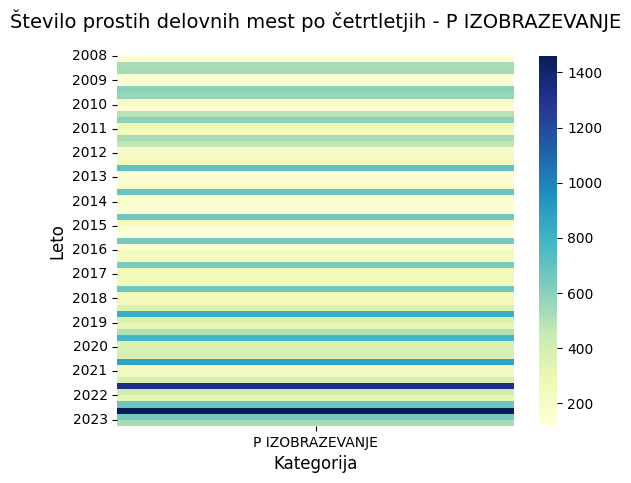

------------------------------------------------------------------------------------


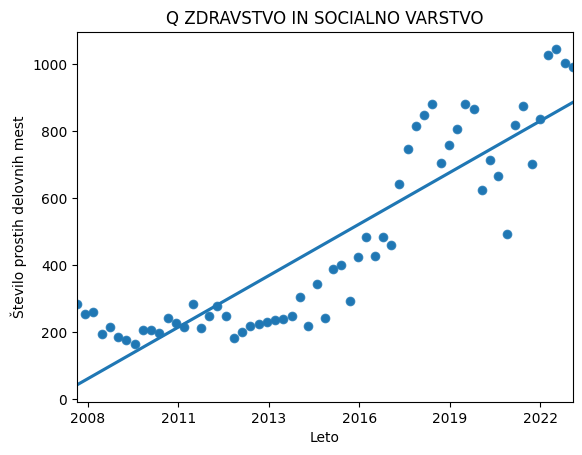

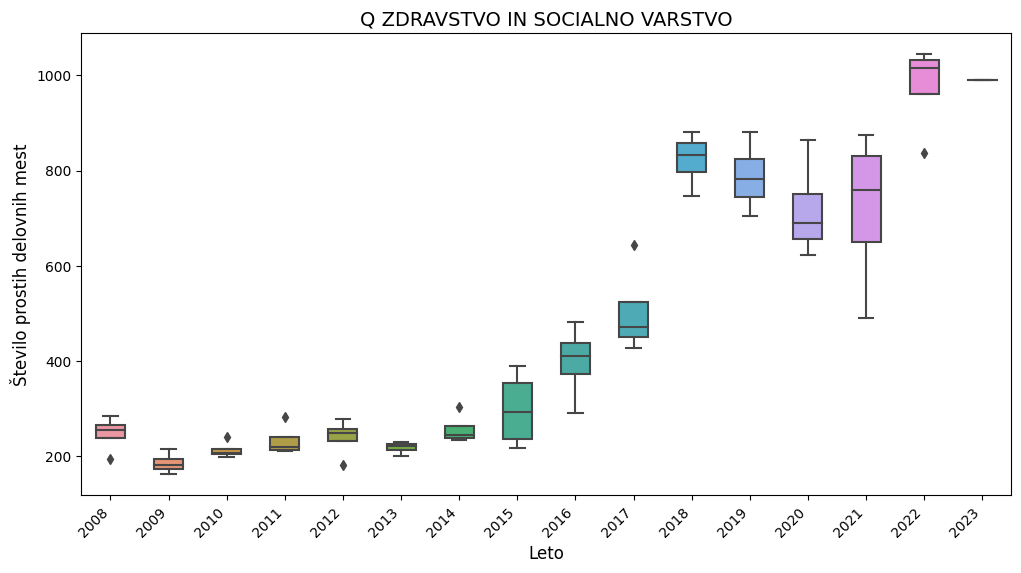

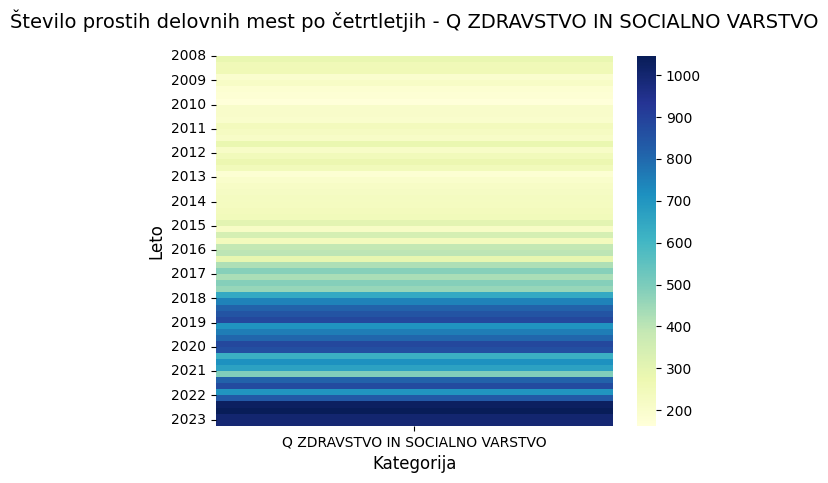

------------------------------------------------------------------------------------


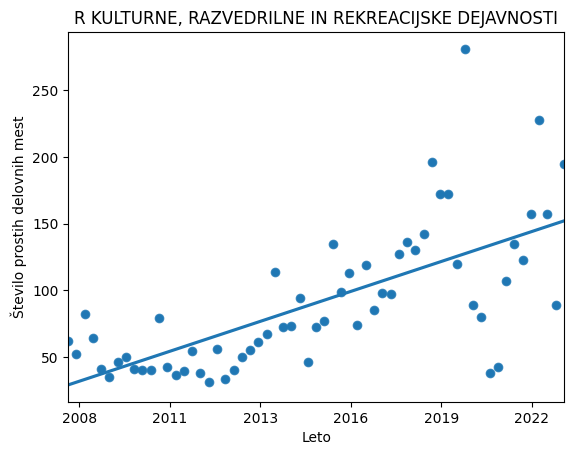

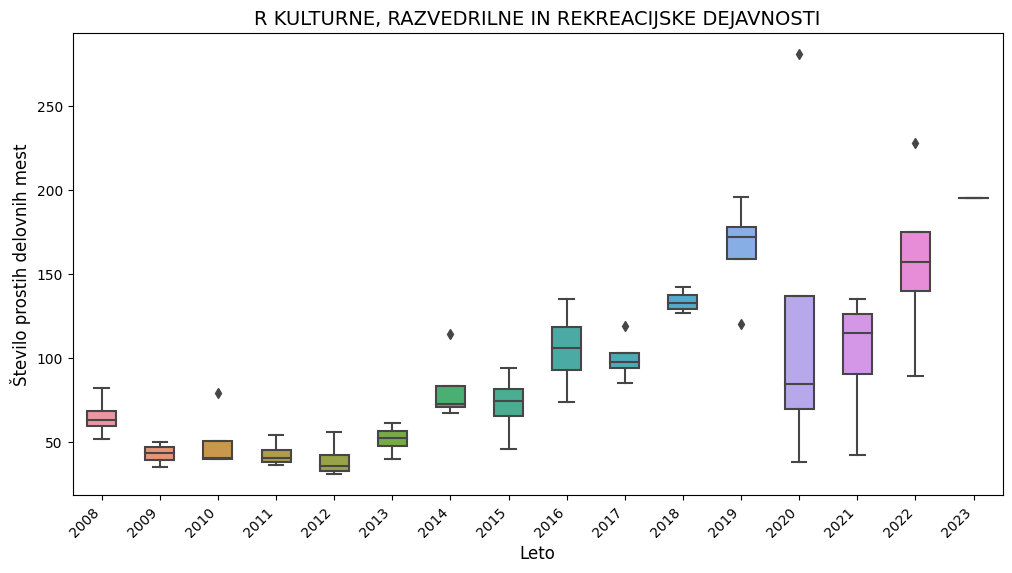

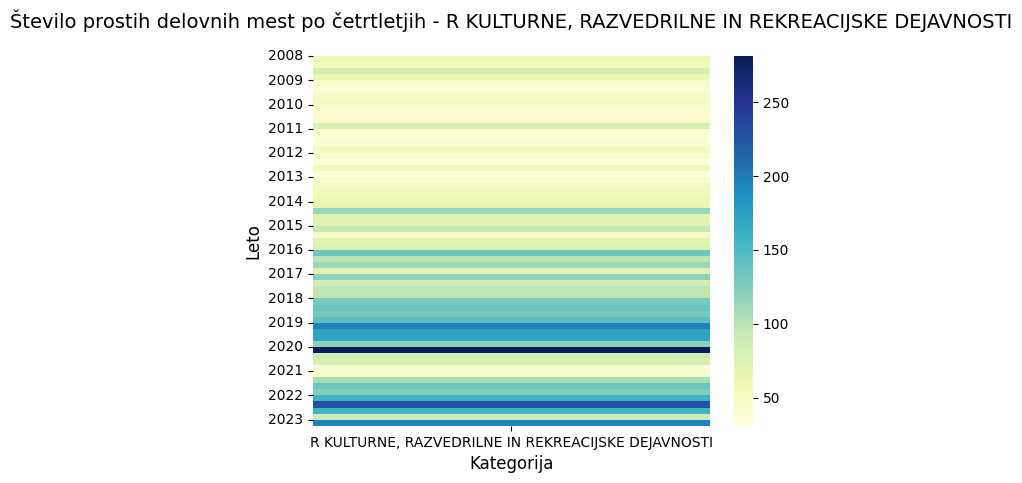

------------------------------------------------------------------------------------


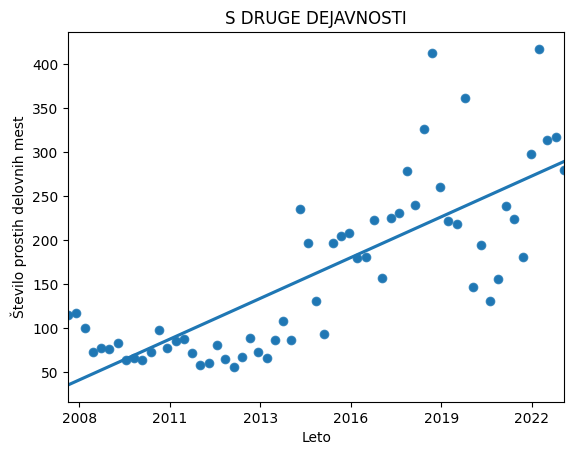

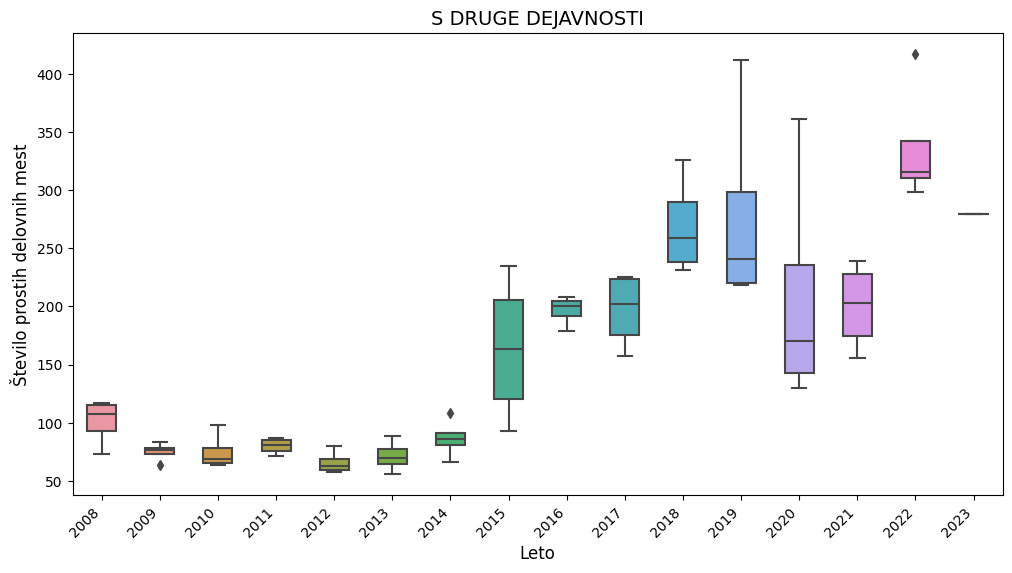

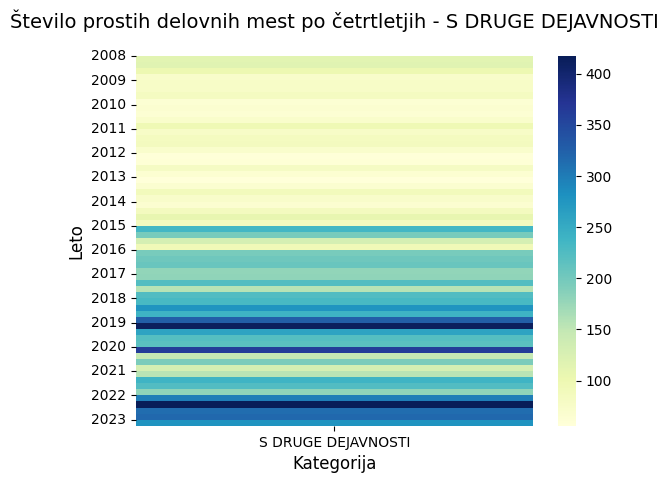

------------------------------------------------------------------------------------


In [6]:
# Pridobimo imena vseh kategorij
categories = prosta_delovna_mesta_skupaj.columns[3:]

# Za vsako kategorijo bomo izrisali pripadajoče vizualizacije
for category in categories:
    
    # Line chart
    fig = px.line(prosta_delovna_mesta_skupaj, x='CETRTLETJE', y=category)
    fig.update_layout(
        xaxis_title='Leto',
        yaxis_title='Število prostih delovnih mest', 
        title=category, 
    )
    
    fig.show()
    
    # ----------------------------------------------------------------------
    
    # Scatter plot z regresijsko črto
    prosta_mesta = prosta_delovna_mesta_skupaj[['CETRTLETJE', category]]
    x = mdates.date2num(prosta_mesta['CETRTLETJE'])
    y = prosta_mesta[category]

    sns.scatterplot(data=prosta_mesta, x=x, y=category)
    sns.regplot(data=prosta_mesta, x=x, y=category, ci=None)

    plt.xlabel('Leto')
    plt.ylabel('Število prostih delovnih mest')
    plt.title(category)

    # Pretvorimo nazaj v datum
    ticklabels = [mdates.num2date(num).strftime('%Y') for num in plt.xticks()[0]]
    plt.xticks(plt.xticks()[0], ticklabels)

    # Omejimo x os samo na obdobje 2008-2022
    plt.xlim([datetime.date(2008, 1, 1), datetime.date(2023, 1, 1)])

    plt.show()
    
    # ----------------------------------------------------------------------
    
    # Ustvarimo novo spremenljivko samo z letom
    prosta_mesta_category = prosta_delovna_mesta_skupaj[['CETRTLETJE', category]].copy()
    prosta_mesta_category['Leto'] = prosta_mesta_category['CETRTLETJE'].dt.year

    # Naredimo boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Leto', y=category, data=prosta_mesta_category, width=0.5)

    plt.xlabel('Leto', fontsize=12)
    plt.ylabel('Število prostih delovnih mest', fontsize=12)
    plt.title(category, fontsize=14)

    plt.xticks(rotation=45, ha='right', fontsize=10)

    plt.show()
    
    # ----------------------------------------------------------------------
    
    prosta_mesta_category_q = prosta_delovna_mesta_skupaj[['CETRTLETJE', category]].copy()
    prosta_mesta_category_q = prosta_mesta_category_q.groupby('CETRTLETJE').mean()

    prosta_mesta_category_q.index = prosta_mesta_category_q.index.strftime('%Y')

    # Ustvarimo heatmap
    fig, ax = plt.subplots()
    sns.heatmap(prosta_mesta_category_q, cmap='YlGnBu', ax=ax)

    ax.set_xlabel('Kategorija', fontsize=12)
    ax.set_ylabel('Leto', fontsize=12)
    ax.set_title('Število prostih delovnih mest po četrtletjih - ' + category, fontsize=14, pad=20)

    # Nastavimo interval
    plt.yticks(range(0, len(prosta_mesta_category_q.index), 4), prosta_mesta_category_q.index[::4])

    plt.show()
    
    print("------------------------------------------------------------------------------------")


In [7]:
print("Interaktivna vizualizacija nam omogoča, da lahko izbiramo, katere kategorije želimo imeti izrisane")

data = []
for category in prosta_delovna_mesta_skupaj.columns[3:]:
    trace = go.Scatter(x=prosta_delovna_mesta_skupaj['CETRTLETJE'],
                       y=prosta_delovna_mesta_skupaj[category],
                       name=category)
    data.append(trace)

layout = go.Layout(
    title='Število prostih delovnih mest po SKD dejavnosti',
    xaxis=dict(title='Leto'),
    yaxis=dict(title='Število prostih delovnih mest'),
    width=1300,
    height=800,
)
fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)

Interaktivna vizualizacija nam omogoča, da lahko izbiramo, katere kategorije želimo imeti izrisane


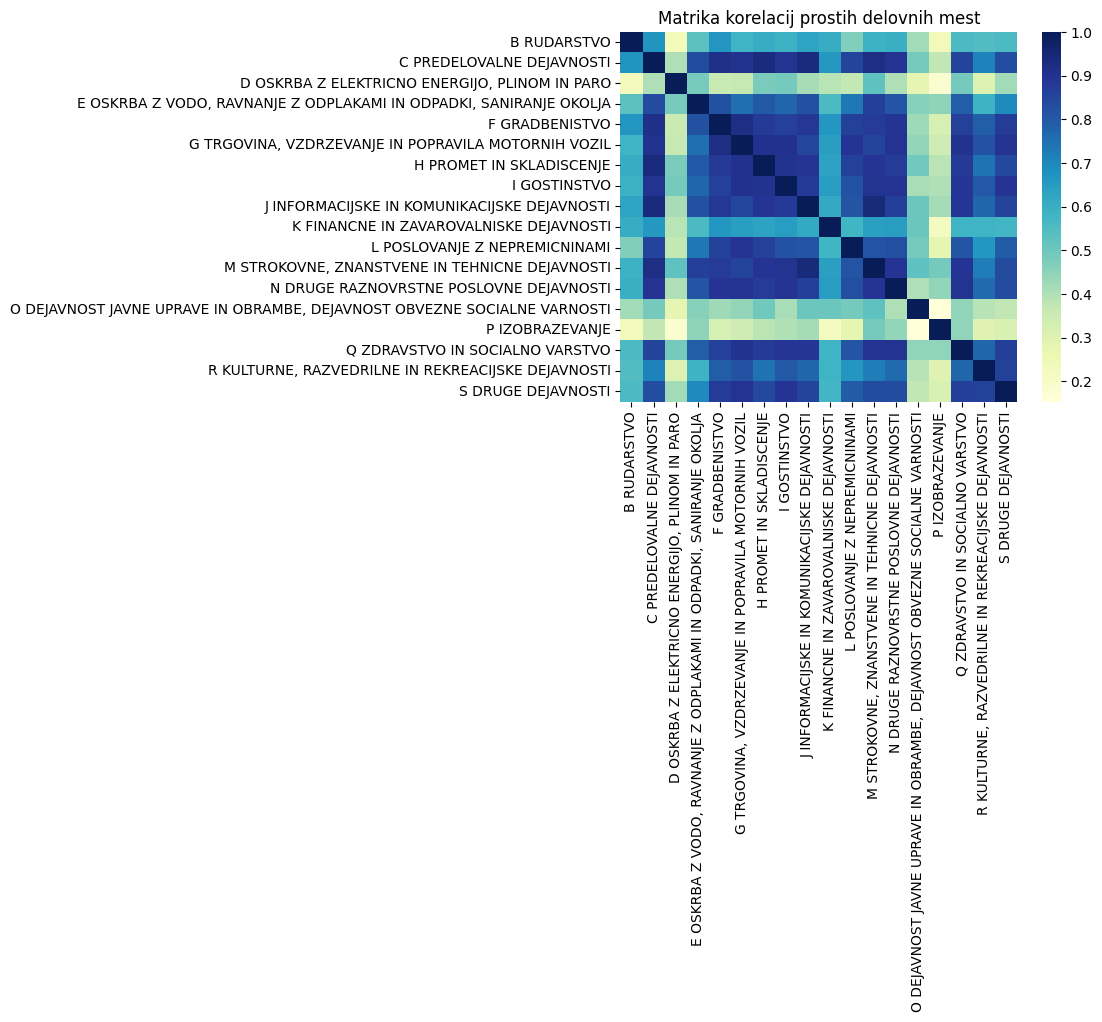

In [8]:
prosta_delovna_mesta_skupaj_without_total = prosta_delovna_mesta_skupaj.drop(columns=['SKD Dejavnost - SKUPAJ [B do S]'])

df = pd.DataFrame(prosta_delovna_mesta_skupaj_without_total)

# Izračun matrike korelacij
corr_matrix = df.corr()

# Izris korelacijskega diagrama
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.title("Matrika korelacij prostih delovnih mest")
plt.show()

In [9]:
df = prosta_delovna_mesta_skupaj.groupby('CETRTLETJE').sum().reset_index()

# stacked bar chart
fig = px.bar(df, x='CETRTLETJE', y=prosta_delovna_mesta_skupaj.columns[3:], 
             title='Število prostih delovnih mest po dejavnostih', 
             color_discrete_sequence=px.colors.qualitative.Alphabet,
             labels={'variable': 'Dejavnost'})

fig.update_layout(
    title='Število prostih delovnih mest po dejavnostih',
    xaxis_title='Leto',
    yaxis_title='Število prostih delovnih mest',
    width=1300,
    height=800
)
fig.show()

---

## ŠTEVILO ZASEDENIH DELOVNIH MEST SKUPAJ

In [10]:
# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo šumnike nadomestili s sprejemljivimi inačicami (Š - S, Č - C, Ž - Z)

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
zasedena_delovna_mesta_skupaj = pd.read_csv("../../podatki/delovna_mesta/zasedena_delovna_mesta_skupaj.csv", sep = ";")

# V vseh vrsticah (z izjemo imen stolpcev) izbrišemo 'M' iz same vrednosti – npr. namesto '3822 M' bo sedaj vrednost '3822'
zasedena_delovna_mesta_skupaj.iloc[:, 1:] = zasedena_delovna_mesta_skupaj.iloc[:, 1:].applymap(lambda x: x.replace('M', '') if isinstance(x, str) else x)

# V naši podatkovni zbirki vrednost 'N' predstavlja manjkajoči podatek - nadomestimo jih z NaN vrednostjo, ki jo bomo
# ustrezno nadomestili z uporabo strojnega učenja
zasedena_delovna_mesta_skupaj.iloc[:, 3:] = zasedena_delovna_mesta_skupaj.iloc[:, 3:].replace('N', pd.np.nan)

# Izberemo 5 najbljižjih sosedov
imputer = KNNImputer(n_neighbors=5)

# Nad vsakim stolpec uporabimo KNNImputer, da nadomestimo manjkajoče vrednosti z napovedjo
zasedena_delovna_mesta_skupaj.iloc[:, 3:] = imputer.fit_transform(zasedena_delovna_mesta_skupaj.iloc[:, 3:])

# Prva dva stolpca pretvorimo v 'STRING'
zasedena_delovna_mesta_skupaj.iloc[:, 0:2] = zasedena_delovna_mesta_skupaj.iloc[:, 0:2].astype(str)
# Preostale stolpce pretvorimo v 'INTEGER'
zasedena_delovna_mesta_skupaj.iloc[:, 2:] = zasedena_delovna_mesta_skupaj.iloc[:, 2:].astype(int)

In [11]:
# Shranimo v .xlsx datoteko
# prosta_delovna_mesta_skupaj.to_excel('prosta_delovna_mesta_skupaj.xlsx', index=False)

In [12]:
# Pregled vseh stolpcev
print(zasedena_delovna_mesta_skupaj.columns)

Index(['CETRTLETJE', 'MERITVE', 'SKD Dejavnost - SKUPAJ [B do S]',
       'B RUDARSTVO', 'C PREDELOVALNE DEJAVNOSTI',
       'D OSKRBA Z ELEKTRICNO ENERGIJO, PLINOM IN PARO',
       'E OSKRBA Z VODO, RAVNANJE Z ODPLAKAMI IN ODPADKI, SANIRANJE OKOLJA',
       'F GRADBENISTVO', 'G TRGOVINA, VZDRZEVANJE IN POPRAVILA MOTORNIH VOZIL',
       'H PROMET IN SKLADISCENJE', 'I GOSTINSTVO',
       'J INFORMACIJSKE IN KOMUNIKACIJSKE DEJAVNOSTI',
       'K FINANCNE IN ZAVAROVALNISKE DEJAVNOSTI',
       'L POSLOVANJE Z NEPREMICNINAMI',
       'M STROKOVNE, ZNANSTVENE IN TEHNICNE DEJAVNOSTI',
       'N DRUGE RAZNOVRSTNE POSLOVNE DEJAVNOSTI',
       'O DEJAVNOST JAVNE UPRAVE IN OBRAMBE, DEJAVNOST OBVEZNE SOCIALNE VARNOSTI',
       'P IZOBRAZEVANJE', 'Q ZDRAVSTVO IN SOCIALNO VARSTVO',
       'R KULTURNE, RAZVEDRILNE IN REKREACIJSKE DEJAVNOSTI',
       'S DRUGE DEJAVNOSTI'],
      dtype='object')


In [13]:
# Pretvorimo prvi stolpec (ČETRTLETJE) v 'DATETIME'
zasedena_delovna_mesta_skupaj.iloc[:,0] = pd.to_datetime(zasedena_delovna_mesta_skupaj.iloc[:,0])

---

## STOPNJA PROSTIH DELOVNIH MEST (%) SKUPAJ

In [14]:
# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo šumnike nadomestili s sprejemljivimi inačicami (Š - S, Č - C, Ž - Z)

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
stopnja_prostih_delovnih_mest_skupaj = pd.read_csv("../../podatki/delovna_mesta/stopnja_prostih_delovnih_mest_skupaj.csv", sep = ";")

# V vseh vrsticah (z izjemo imen stolpcev) izbrišemo 'M' iz same vrednosti – npr. namesto '3822 M' bo sedaj vrednost '3822'
stopnja_prostih_delovnih_mest_skupaj.iloc[:, 1:] = stopnja_prostih_delovnih_mest_skupaj.iloc[:, 1:].applymap(lambda x: x.replace('M', '') if isinstance(x, str) else x)

# V naši podatkovni zbirki vrednost 'N' predstavlja manjkajoči podatek - nadomestimo jih z NaN vrednostjo, ki jo bomo
# ustrezno nadomestili z uporabo strojnega učenja
stopnja_prostih_delovnih_mest_skupaj.iloc[:, 3:] = stopnja_prostih_delovnih_mest_skupaj.iloc[:, 3:].replace('N', pd.np.nan)

# Zaradi kasnejših pretvorb v 'FLOAT' nadomestimo vse ',' s '.'
stopnja_prostih_delovnih_mest_skupaj.iloc[:, 2:] = stopnja_prostih_delovnih_mest_skupaj.iloc[:, 2:].applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Izberemo 5 najbljižjih sosedov
imputer = KNNImputer(n_neighbors=5)

# Nad vsakim stolpec uporabimo KNNImputer, da nadomestimo manjkajoče vrednosti z napovedjo
stopnja_prostih_delovnih_mest_skupaj.iloc[:, 3:] = imputer.fit_transform(stopnja_prostih_delovnih_mest_skupaj.iloc[:, 3:])

# Prva dva stolpca pretvorimo v 'STRING'
stopnja_prostih_delovnih_mest_skupaj.iloc[:, 0:2] = zasedena_delovna_mesta_skupaj.iloc[:, 0:2].astype(str)
# Preostale stolpce pretvorimo v 'FLOAT'
stopnja_prostih_delovnih_mest_skupaj.iloc[:, 2:] = stopnja_prostih_delovnih_mest_skupaj.iloc[:, 2:].astype(float)

In [15]:
# Shranimo v .xlsx datoteko
# stopnja_prostih_delovnih_mest_skupaj.to_excel('stopnja_prostih_delovnih_mest_skupaj.xlsx', index=False)

In [16]:
# Pregled vseh stolpcev
print(zasedena_delovna_mesta_skupaj.columns)

Index(['CETRTLETJE', 'MERITVE', 'SKD Dejavnost - SKUPAJ [B do S]',
       'B RUDARSTVO', 'C PREDELOVALNE DEJAVNOSTI',
       'D OSKRBA Z ELEKTRICNO ENERGIJO, PLINOM IN PARO',
       'E OSKRBA Z VODO, RAVNANJE Z ODPLAKAMI IN ODPADKI, SANIRANJE OKOLJA',
       'F GRADBENISTVO', 'G TRGOVINA, VZDRZEVANJE IN POPRAVILA MOTORNIH VOZIL',
       'H PROMET IN SKLADISCENJE', 'I GOSTINSTVO',
       'J INFORMACIJSKE IN KOMUNIKACIJSKE DEJAVNOSTI',
       'K FINANCNE IN ZAVAROVALNISKE DEJAVNOSTI',
       'L POSLOVANJE Z NEPREMICNINAMI',
       'M STROKOVNE, ZNANSTVENE IN TEHNICNE DEJAVNOSTI',
       'N DRUGE RAZNOVRSTNE POSLOVNE DEJAVNOSTI',
       'O DEJAVNOST JAVNE UPRAVE IN OBRAMBE, DEJAVNOST OBVEZNE SOCIALNE VARNOSTI',
       'P IZOBRAZEVANJE', 'Q ZDRAVSTVO IN SOCIALNO VARSTVO',
       'R KULTURNE, RAZVEDRILNE IN REKREACIJSKE DEJAVNOSTI',
       'S DRUGE DEJAVNOSTI'],
      dtype='object')


In [17]:
# Pretvorimo prvi stolpec (ČETRTLETJE) v 'DATETIME'
stopnja_prostih_delovnih_mest_skupaj.iloc[:,0] = pd.to_datetime(stopnja_prostih_delovnih_mest_skupaj.iloc[:,0])

---